## 더미데이터 생성 및 저장

In [ ]:
# 더미 데이터 생성
import pandas as pd
import numpy as np

np.random.seed(42)

n = 80
df = pd.DataFrame({
    "student_id": np.arange(1, n+1),
    "study_time": np.round(np.random.gamma(shape=2.0, scale=2.0, size=n), 1),          # 주간 학습시간(대충 0~15)
    "assignment_rate": np.round(np.clip(np.random.normal(0.75, 0.18, n), 0, 1), 2),    # 과제 제출률(0~1)
    "lms_login": np.random.randint(0, 30, n),                                          # 접속 횟수
    "absence": np.random.poisson(0.6, n),                                              # 결석
    "late": np.random.poisson(0.8, n),                                                 # 지각
})

# 성적(타겟) 생성: 학습시간/과제/접속은 +, 결석/지각은 -
noise = np.random.normal(0, 6, n)
df["total_score"] = np.round(
    55
    + df["study_time"] * 2.2
    + df["assignment_rate"] * 25
    + df["lms_login"] * 0.4
    - df["absence"] * 6
    - df["late"] * 3
    + noise
, 1)

df.head()

,student_id,study_time,assignment_rate,lms_login,absence,late,total_score
0,1,4.8,0.58,11,1,0,75.4
1,2,3.0,1.00,18,1,1,91.1
2,3,2.8,0.61,22,1,3,68.8
3,4,2.8,0.69,14,1,0,77.5
4,5,9.3,0.90,27,0,0,118.9


In [ ]:
# CSV로 저장
import os
os.makedirs("../data/raw", exist_ok=True)
df.to_csv("../data/raw/student_learning.csv", index=False, encoding="utf-8-sig")

# 학습 유형 탐색적 분석

## 데이터 요약

In [19]:

df.info()
df.describe()
df.isnull().sum()

<class 'pandas.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   student_id       80 non-null     int64  
 1   study_time       80 non-null     float64
 2   assignment_rate  80 non-null     float64
 3   lms_login        80 non-null     int32  
 4   absence          80 non-null     int32  
 5   late             80 non-null     int32  
 6   total_score      80 non-null     float64
dtypes: float64(3), int32(3), int64(1)
memory usage: 3.6 KB


student_id         0
study_time         0
assignment_rate    0
lms_login          0
absence            0
late               0
total_score        0
dtype: int64

## 분포 확인

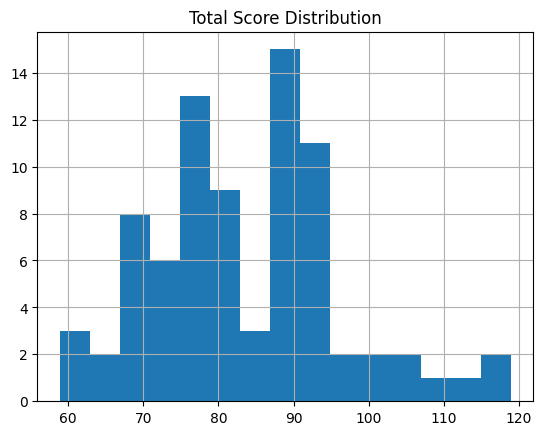

In [ ]:
import matplotlib.pyplot as plt

df["total_score"].hist(bins=15)
plt.title("Total Score Distribution")
plt.show()

## 상관관계 히트맵

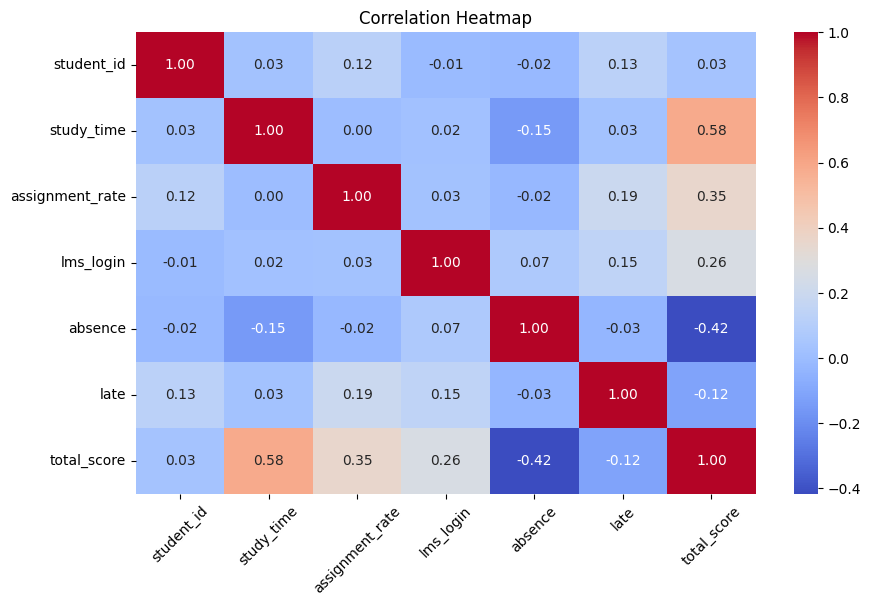

In [ ]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.xticks(rotation=45)
plt.show()

## 핵심 산점도 시각화

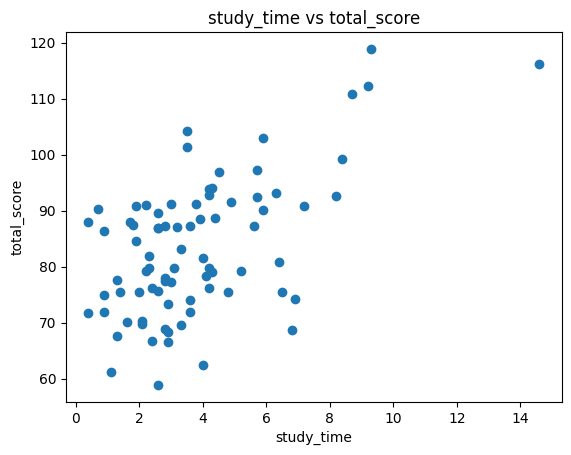

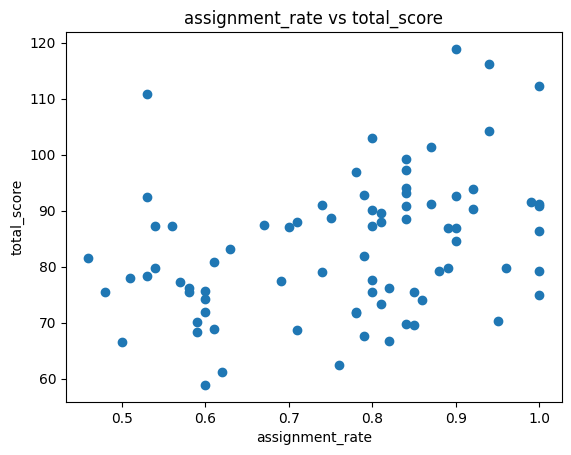

In [ ]:
plt.scatter(df["study_time"], df["total_score"])
plt.xlabel("study_time")
plt.ylabel("total_score")
plt.title("study_time vs total_score")
plt.show()

plt.scatter(df["assignment_rate"], df["total_score"])
plt.xlabel("assignment_rate")
plt.ylabel("total_score")
plt.title("assignment_rate vs total_score")
plt.show()

## 상/하위 그룹 비교(20%)

In [18]:

top = df.nlargest(int(len(df)*0.2), "total_score")
bottom = df.nsmallest(int(len(df)*0.2), "total_score")

print(top.mean(numeric_only=True), '\n')
print(bottom.mean(numeric_only=True))

student_id          48.62500
study_time           6.63750
assignment_rate      0.82875
lms_login           19.18750
absence              0.37500
late                 0.81250
total_score        101.19375
dtype: float64 

student_id         43.937500
study_time          2.550000
assignment_rate     0.711875
lms_login          13.437500
absence             1.437500
late                1.062500
total_score        67.787500
dtype: float64


# EduTech 학습 데이터 탐색적 분석 (EDA) 결과 보고서

본 보고서는 EduTech 플랫폼에서 수집된 학생 학습 데이터를 바탕으로 수행한 탐색적 데이터 분석(EDA)의 주요 결과를 요약한 것이다.

## 성적과 상관관계가 높은 변수

분석 결과, 총점(total_score)과 높은 상관을 보인 변수는 다음과 같다.

1. 과제 제출률 (assignment_rate)
2. 학습시간 (study_time)
3. LMS 접속 횟수 (lms_login)

특히 과제 제출률은 성적과 가장 높은 양의 상관관계를 보였으며,<br>
지속적인 과제 수행이 학업 성취에 중요한 영향을 미치는 것으로 해석된다.

## 상위권·하위권 학습행동 차이

상위 20%와 하위 20% 학생의 평균을 비교한 결과 다음과 같은 차이가 확인되었다.

1. 상위권은 주간 학습시간이 약 2배 높음
2. 과제 제출률이 30% 이상 높음
3. 결석 및 지각 횟수가 현저히 낮음

이는 학습시간뿐 아니라 학습 지속성(과제 수행, 출결)이 성취도에 복합적으로 작용함을 시사한다.

## 교육 현장 적용 방안

1. 과제 제출률 기반 위험군 탐지<br>
   과제 제출률이 50% 이하인 학생을 자동 탐지하여<br>
   최성보 예방 프로그램 선정 학생의 기준을 마련할 수 있다.

2. LMS 접속 패턴 기반 학습 개입<br>
   LMS 접속 횟수가 낮은 학생에게는<br>
   학습 알림 및 보충 자료 제공 시스템을 구축할 수 있다.